## Teste das bibliotecas de Clustering de Time-Series

In [17]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import clustering
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
date_first_case = '2020-03-01'
today = str(datetime.today().strftime('%Y-%m-%d'))
df = pd.read_csv("../datasets/obito_cartorio.csv")
df = df.filter(["date", "state", "deaths_covid19", "new_deaths_covid19"]).fillna(0)
df = df.sort_values(by=['date','state'])
df = df.loc[(df['date'] >= date_first_case) & (df['date'] <= today)]
obito_cartorio_pd = df

In [3]:
def unique(list1): 
    unique_list = dict()
    for x in list1: 
        unique_list[x] = x
    return sorted(list(unique_list.keys()))
state_list = unique(list(np.array(obito_cartorio_pd["state"])))
print("state_list: ", len(state_list), state_list)

state_list:  27 ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']


In [4]:
states_norm = dict()
for state in state_list:
    data = np.array(obito_cartorio_pd.loc[obito_cartorio_pd['state'] == state]["new_deaths_covid19"])
    max_val = max(data)
    states_norm[state] = data / max_val

In [5]:
clustering_array_np = np.array(list(states_norm.values()), dtype=np.double)
clustering_array_np.shape

(27, 89)

In [6]:
# imprimir array sem notação científica
np.set_printoptions(suppress=True)

In [7]:
# SciPy linkage clustering
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx3 = model3.fit(clustering_array_np)

In [8]:
# Clustering
model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
cluster_idx1 = model1.fit(clustering_array_np)

 96%|█████████▋| 26/27 [00:00<00:00, 8719.27it/s]


In [9]:
# Augment Hierarchical object to keep track of the full tree
model2 = clustering.HierarchicalTree(model1)
cluster_idx2 = model2.fit(clustering_array_np)

 96%|█████████▋| 26/27 [00:00<00:00, 7523.42it/s]


(None,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x12d005b90>,
       dtype=object))

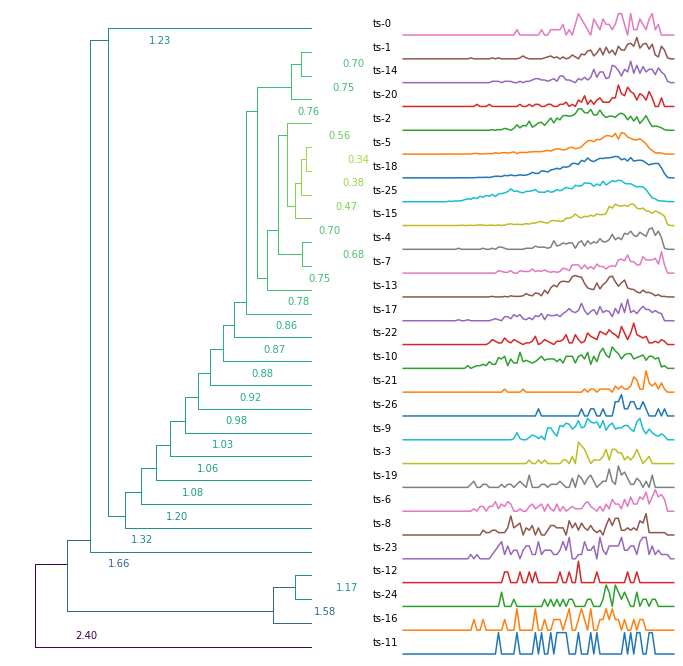

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
show_ts_label = lambda idx: "ts-" + str(idx)
model2.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)

(None,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x12cb51090>,
       dtype=object))

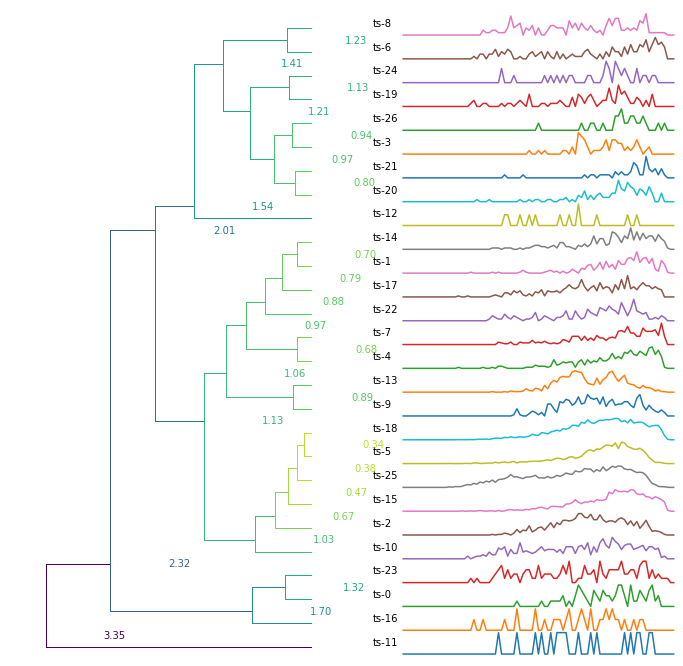

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
show_ts_label = lambda idx: "ts-" + str(idx)
model3.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)